**Column Details:**

1. **Loan_ID** – Unique identifier for each loan application.  
2. **Gender** – Gender of the applicant (Male/Female).  
3. **Married** – Marital status of the applicant (Yes/No).  
4. **Dependents** – Number of dependents the applicant has.  
5. **Education** – Education level of the applicant (Graduate/Not Graduate).  
6. **Self_Employed** – Indicates if the applicant is self-employed (Yes/No).  
7. **ApplicantIncome** – Monthly income of the primary applicant.  
8. **CoapplicantIncome** – Monthly income of the co-applicant (if any).  
9. **LoanAmount** – Loan amount requested by the applicant (in thousands).  
10. **Loan_Amount_Term** – Duration of the loan in months.  
11. **Credit_History** – Credit history of the applicant (1 for good, 0 for bad).  
12. **Property_Area** – Type of area where the property is located (Urban/Rural/Semiurban).  
13. **Loan_Status** – Final loan approval status (Y for approved, N for rejected).  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedGroupKFold, StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/loan_status_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.drop("Loan_ID", axis=1, inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


#EDA

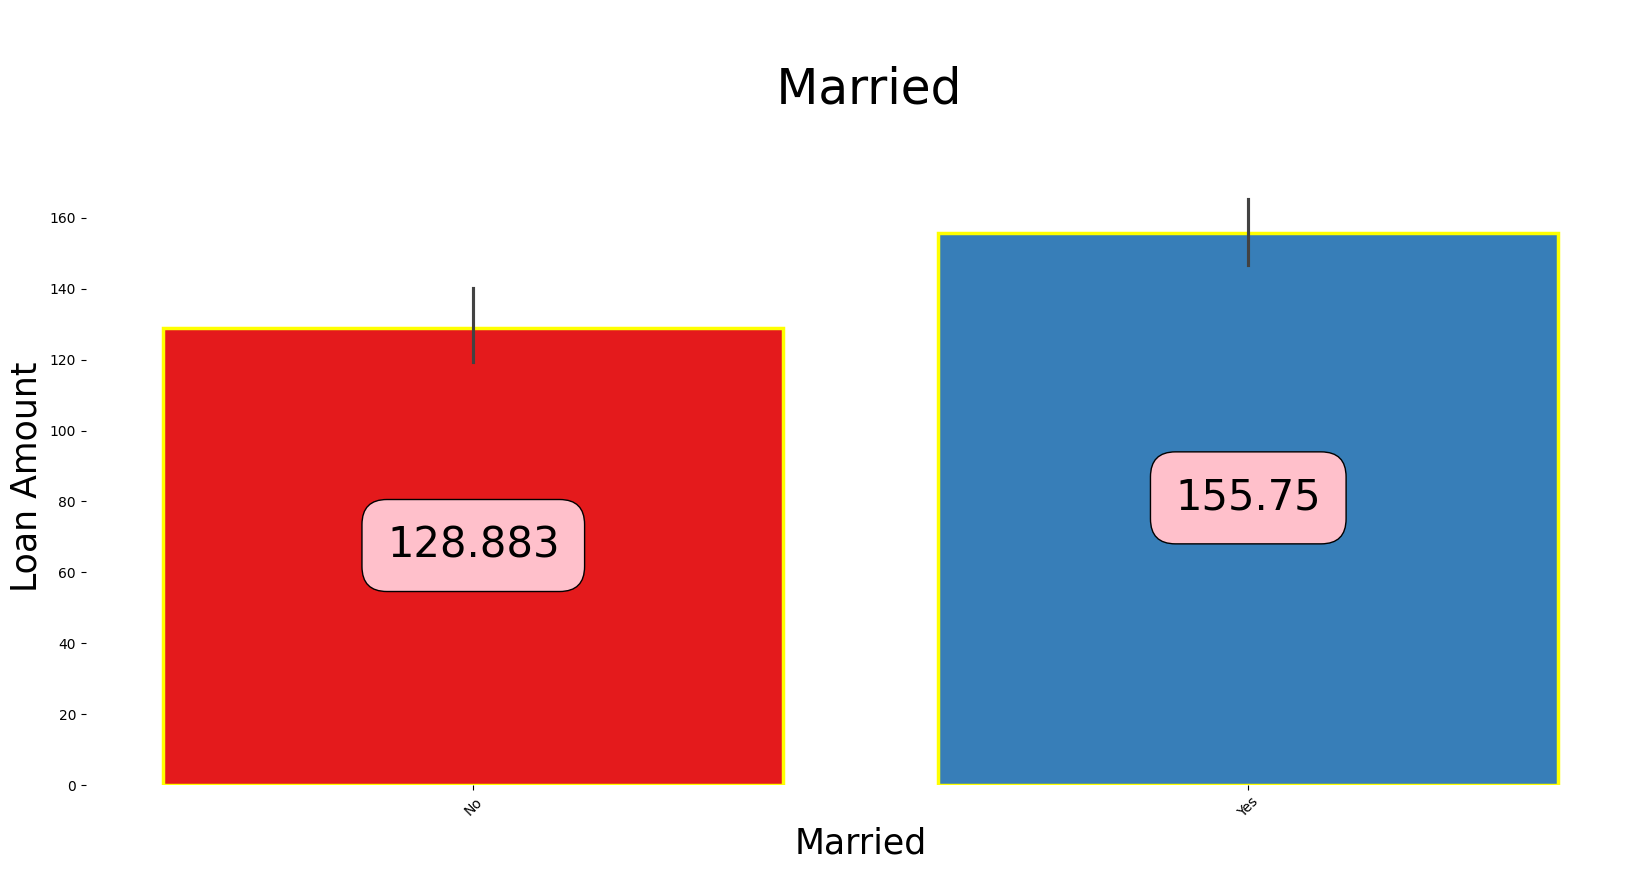

In [8]:
plt.subplots(figsize=(20, 8))
p = sns.barplot(x='Married', y='LoanAmount', data=df, palette="Set1", saturation=2, edgecolor='yellow',linewidth=2.5,)
p.axes.set_title("\n Married\n", fontsize=35)
plt.xlabel("Married", fontsize=25)
plt.ylabel("Loan Amount", fontsize=25)

plt.xticks(rotation=45)
for container in p.containers:
    p.bar_label(container, label_type = 'center', padding=8, size=30, color = 'black', rotation=0,
                bbox = {'boxstyle': "round", "pad":0.6, "facecolor":"pink","edgecolor":"black","alpha":1})
sns.despine(left=True, bottom=True)
plt.show()

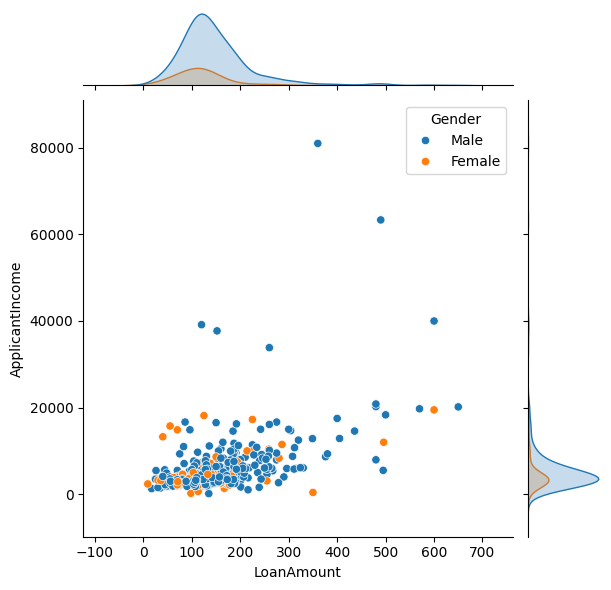

In [9]:
sns.jointplot(data=df, x = 'LoanAmount', y = 'ApplicantIncome', hue = 'Gender');

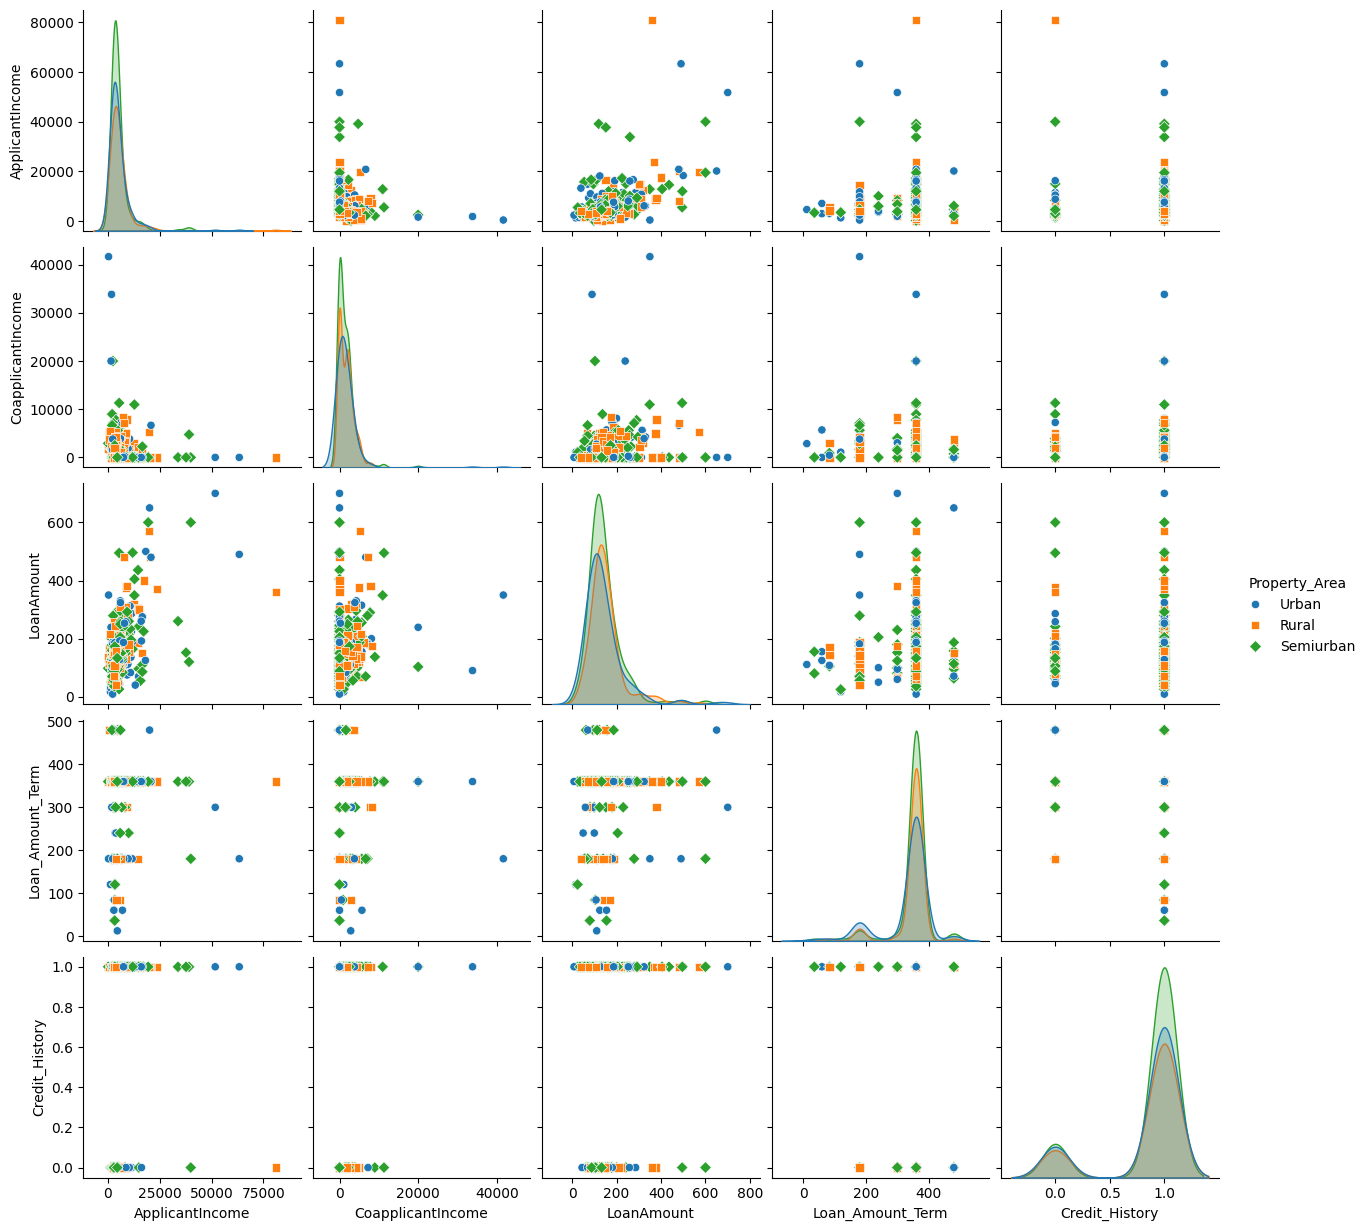

In [10]:
sns.pairplot(df, hue='Property_Area', markers=['o','s','D']);

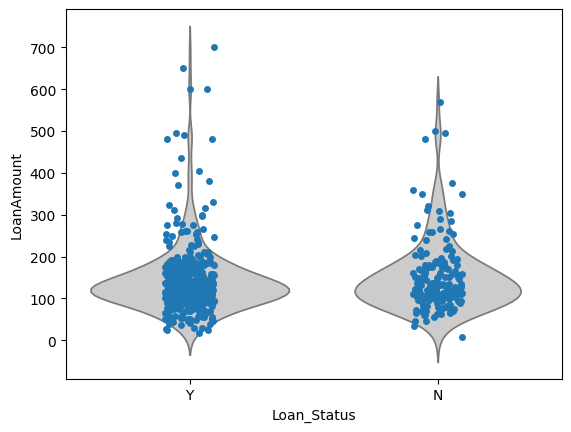

In [11]:
ax = sns.violinplot(x='Loan_Status', y='LoanAmount', data=df, inner=None, color=".8")
ax = sns.stripplot(x='Loan_Status', y='LoanAmount', data=df)

<Figure size 1600x500 with 0 Axes>

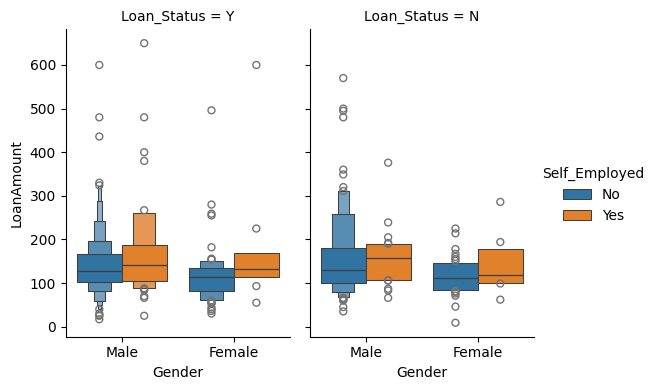

In [12]:
plt.figure(figsize=(16, 5))
g = sns.catplot(x="Gender", y="LoanAmount", hue='Self_Employed', col = "Loan_Status", data=df, kind='boxen', height=4, aspect=.7);


#Pipelines

In [13]:
# Feature extraction
x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban


In [16]:
y_train.sample(5)

,Loan_Status
502,Y
28,N
62,N
207,Y
348,Y


In [17]:
num_var_mean = ['LoanAmount']
num_var_mostfrequent = ['Loan_Amount_Term', 'Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']
num_no_missingvalue = ['Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Loan_Status']

num_var_meanimputer = Pipeline(steps =[('impuer', SimpleImputer(strategy='mean'))])
num_var_most_frequent = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent'))])

In [18]:
# imputation transformer
trf1 = ColumnTransformer([("mean_imputer", num_var_meanimputer, num_var_mean),
                          ("most_frequent_imputer", num_var_most_frequent, num_var_mostfrequent)],
                         remainder = 'passthrough')

In [19]:
# One hot encoding
trf2 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,3,4,10])
    ], remainder = 'passthrough')

In [20]:
trf3 = ColumnTransformer([
    ('scale', RobustScaler(), slice(0, 20))
])

In [21]:
# Scaling
trf4 = SelectKBest(score_func = chi2, k=8)

In [22]:
# Training model
trf5 = DecisionTreeClassifier()

In [23]:
pipe_dec = Pipeline([
    ("trf1", trf1),
    ("trf2", trf2),
    ("trf3", trf3),
    ("trf4", trf4),
    ("trf5", trf5),
])

In [24]:
pipe_dec.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('mean_imputer',
                                  Pipeline(steps=[('impuer', SimpleImputer())]),
                                  ['LoanAmount']),
                                 ('most_frequent_imputer',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  ['Loan_Amount_Term', 'Gender', 'Married',
                                   'Self_Employed', 'Credit_History',
                                   'Dependents'])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [0, 1, 3, 4, 10])]),
 'trf3': ColumnTransformer(transformers=[('scale', RobustSca

In [25]:
# LEt's display the pipelines we have created
from sklearn import set_config
set_config(display='diagram')

In [26]:
# train
pipe_dec.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  Pipeline(steps=[('impuer',
                                                                   SimpleImputer())]),
                                                  ['LoanAmount']),
                                                 ('most_frequent_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Loan_Amount_Term', 'Gender',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 20, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7ac261154fe0>)),
                ('trf5', DecisionTreeClassifier())])

In [27]:
# predict
y_pred = pipe_dec.predict(x_test)

# print accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred)*100, 2),"%")

Accuracy Score:  65.04 %


In [28]:
# implementing cross validation
from sklearn.model_selection import cross_val_score

print("cross_val_score: ", scores := cross_val_score(pipe_dec, x_train, y_train, cv=5, scoring='accuracy').round(4)*100, "%")
print("cross_val_score_mean",scores.mean().round(3),"%")

cross_val_score:  [69.7  69.39 69.39 69.39 69.39] %


In [30]:
# implemneting gridsearchcv
params = {
    'trf5__max_depth':[1, 2, 3, 4, 5, None],

}

from sklearn.model_selection import GridSearchCV

grid_dec = GridSearchCV(pipe_dec, params, cv=5, scoring='accuracy')
grid_dec.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mean_imputer',
                                                                         Pipeline(steps=[('impuer',
                                                                                          SimpleImputer())]),
                                                                         ['LoanAmount']),
                                                                        ('most_frequent_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Loan_Amount_Term',
                                                                          'Gender',
                                                                          'Married',
                                                                          'Self_Employed',
                                                                          'Credit_History...
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [0, 1,
                                                                          3, 4,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 20, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7ac261154fe0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [31]:
print("Grid Best Score: ", grid_dec.best_score_.round(2)*100, "%")

Grid Best Score:  70.0 %


In [32]:
print("Grid Best Parameter: ", grid_dec.best_params_)

Grid Best Parameter:  {'trf5__max_depth': 1}


In [33]:
# Using the best parameter to built the model
dec_grid = grid_dec.best_estimator_

decision_train_grid = round(dec_grid.score(x_train, y_train)*100, 2)
decision_accuracy_grid = round(dec_grid.score(x_test, y_test)*100, 2)

print("Training Accuracy with GridSearch: ", decision_train_grid, "%")
print("Testing Accuracy with GridSearch: ", decision_accuracy_grid, "%")

Training Accuracy with GridSearch:  69.86 %
Testing Accuracy with GridSearch:  65.04 %


# Logistic Regression


In [34]:
num_var_mean = ['LoanAmount']
num_var_mostfrequent = ['Loan_Amount_Term', 'Gender','Married', 'Self_Employed', 'Credit_History', 'Dependents']
num_no_missingvalue = ['Education', 'ApplicantIncome', 'CoapplicantIncome','Property_Area', 'Loan_Status']

num_var_meanimputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
num_var_most_frequent = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent'))])

trf1 = ColumnTransformer([('mean_imputer', num_var_meanimputer, num_var_mean),
                         ('most_frequent_imputer', num_var_most_frequent, num_var_mostfrequent)],
                        remainder = 'passthrough')

# OneHotEncoding
trf2 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown = 'ignore'),
     [0,1,3,4,10])
], remainder='passthrough')

# Feature Scaling
trf3 = ColumnTransformer([
    ('scale', RobustScaler(), slice(0,20))
])

# train the model using Logistic Regression
trf5 = LogisticRegression()

# Forming pipeline for LR Model
pipe_lr = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
])

In [35]:
pipe_lr.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('mean_imputer',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['LoanAmount']),
                                 ('most_frequent_imputer',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  ['Loan_Amount_Term', 'Gender', 'Married',
                                   'Self_Employed', 'Credit_History',
                                   'Dependents'])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [0, 1, 3, 4, 10])]),
 'trf3': ColumnTransformer(transformers=[('scale', RobustSc

In [36]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['LoanAmount']),
                                                 ('most_frequent_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Loan_Amount_Term', 'Gender',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 20, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7ac261154fe0>)),
                ('trf5', LogisticRegression())])

In [37]:
# Predicting the values
y_pred = pipe_lr.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred), 2)*100, "%")

Accuracy Score:  65.0 %


In [39]:
#cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

print("Cross val Score: ", cross_val_score(pipe_lr, x_train, y_train, cv=5, scoring='accuracy').round(3)*100, '%')
print("Cross Val Score: ", cross_val_score(pipe_lr, x_train, y_train, cv=5, scoring='accuracy').mean().round(2)*100, "%")

Cross val Score:  [69.7 69.4 69.4 69.4 70.4] %
Cross Val Score:  70.0 %


In [41]:
C_vals = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7,8,9, 10, 11, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18, 20, 25]
penalties = ['l1', 'l2']

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25)

param = {'trf5__penalty':penalties, 'trf5__C': C_vals}

logreg = LogisticRegression(solver='liblinear')

#calling gridsearchcv object
grid_log = GridSearchCV(pipe_lr,
                        param_grid=param,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=cv
                        )

# fitting the grid model
grid_log.fit(x_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mean_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['LoanAmount']),
                                                                        ('most_frequent_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 20, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7ac261154fe0>)),
                                       ('trf5', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'trf5__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                                     2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                     15, 16, 16.5, 17, 17.5, 18, 20, 25],
                         'trf5__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [42]:
print("Grid Best Score: ", grid_log.best_score_.round(2)*100, "%")

Grid Best Score:  70.0 %


In [43]:
print("Grid Best Params: ", grid_log.best_params_)

Grid Best Params:  {'trf5__C': 0.2, 'trf5__penalty': 'l2'}


In [47]:
log_grid = grid_log.best_estimator_

log_train_grid = round(log_grid.score(x_train, y_train)*100, 2)
log_accuracy_grid = round(log_grid.score(x_train, y_train)*100, 2)

print("Training Accuracy with GridSearch: ", log_train_grid, "%")
print("Model Accuracy with GridSearch: ", log_accuracy_grid, "%")

Training Accuracy with GridSearch:  69.65 %
Model Accuracy with GridSearch:  69.65 %
